# US College Analysis

## by Damien Ha

I will be doing a brief analysis on data from the Top 100 US Colleges. I obtained this dataset in summer 2021 from UCLA's Stats 20 CCLE course page.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's first take a look at what the first and last values of the data look like

In [2]:
df = pd.read_excel("Top100_US_colleges.xlsx")
df.head()

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio
0,1,Stanford University,CA,"$56,169",1505,0.04,17381,0.94,5 to 1
1,2,Harvard University,MA,"$54,002",1515,0.05,31566,0.97,7 to 1
2,3,Princeton University,NJ,"$48,502",1515,0.06,8374,0.98,5 to 1
3,4,Massachusetts Institute of Technology,MA,"$53,450",1540,0.07,11574,0.95,3 to 1
4,5,Columbia University in the City of New York,NY,"$61,671",1505,0.05,31077,0.95,6 to 1


In [3]:
df.tail()

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio
95,96,University of Hawaii at Manoa,HI,"$34,218",1170,0.58,17710,0.61,12 to 1
96,97,San Diego State University,CA,"$19,600",1215,0.34,35303,0.73,27 to 1
97,98,Florida International University,FL,"$18,963",1195,0.58,57942,0.63,26 to 1
98,99,University of Denver,CO,"$53,775",1260,0.59,11952,0.77,12 to 1
99,100,Harding University,AR,"$21,540",1165,0.61,5121,0.69,16 to 1


Let's look at some basic features of the data

In [4]:
# Check shape
print(df.shape)

(100, 9)


In [5]:
# Check for NaN values
df.isna().sum()

Rank                            0
College Name                    0
State                           0
Undergraduate Tuition & Fees    0
SAT Score                       0
Acceptance Rate                 0
Population                      0
Graduation Rate                 0
Student to Faculty Ratio        0
dtype: int64

In [6]:
# Check data types
df.dtypes

Rank                              int64
College Name                     object
State                            object
Undergraduate Tuition & Fees     object
SAT Score                        object
Acceptance Rate                 float64
Population                        int64
Graduation Rate                 float64
Student to Faculty Ratio         object
dtype: object

I wanted SAT score to be an integer. When trying to turn SAT Score into an integer, I discovered the value below, and converted it to NaN.

In [7]:
df.loc[df['SAT Score'] == '-']

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate,Student to Faculty Ratio
79,80,Wake Forest University,NC,"$57,760",-,0.3,8401,0.88,10 to 1


In [8]:
df['SAT Score'].replace({'-': np.nan}, inplace=True)

In [9]:
df['Undergraduate Tuition & Fees'] = df['Undergraduate Tuition & Fees'].replace("[$,]", "", regex=True).astype(int)

In [10]:
df.dtypes

Rank                              int64
College Name                     object
State                            object
Undergraduate Tuition & Fees      int64
SAT Score                       float64
Acceptance Rate                 float64
Population                        int64
Graduation Rate                 float64
Student to Faculty Ratio         object
dtype: object

I'll print some average statistics of our numerical factors to give an overview of the averages of these values in the United States, then look at the statistics of those values

In [11]:
print("The average SAT score of the top 100 colleges in the US is " + str(round(df['SAT Score'].mean())))
print("The average student population of the top 100 colleges in the US is " + str(round(df['Population'].mean())))
print("The average tuition of the top 100 colleges in the US is $" + str(round(df['Undergraduate Tuition & Fees'].mean())))
print("The average acceptance rate of the top 100 colleges in the US is " + str(round(df['Acceptance Rate'].mean()*100, 2)) + "%")
print("The average graduation rate of the top 100 colleges in the US is " + str(round(df['Graduation Rate'].mean()*100, 2)) + "%")

The average SAT score of the top 100 colleges in the US is 1368
The average student population of the top 100 colleges in the US is 24881
The average tuition of the top 100 colleges in the US is $46046
The average acceptance rate of the top 100 colleges in the US is 36.68%
The average graduation rate of the top 100 colleges in the US is 84.67%


In [12]:
df['SAT Score'].describe()

count      99.000000
mean     1367.525253
std       108.457115
min       915.000000
25%      1290.000000
50%      1365.000000
75%      1442.500000
max      1545.000000
Name: SAT Score, dtype: float64

The minimum SAT score looks a little low to me, let's see what college it is and determine if it's an outlier

In [13]:
print(df[df['SAT Score'] == 915])

    Rank          College Name State  Undergraduate Tuition & Fees  SAT Score  \
73    74  Gallaudet University    DC                         17038      915.0   

    Acceptance Rate  Population  Graduation Rate Student to Faculty Ratio  
73             0.61        1557             0.51                   6 to 1  


In [14]:
# Z-score for the lowest SAT score
print((915-1368)/108)

-4.194444444444445


This value is an outlier. The absolute value of its standard deviation is greater than 3. This makes sense, I've studied American Sign Language before and happen to know that Gaullaudet is a deaf school. A great deal of mainstreamed deaf students likely have not had the proper educational resources for most of their academic careers, or do not have proper accomodations at hearing schools.

In [15]:
df['SAT Score'].nsmallest(2)

73     915.0
99    1165.0
Name: SAT Score, dtype: float64

In [16]:
# Z-score for the second lowest SAT score
print((1165-1368)/108)

-1.8796296296296295


The second lowest SAT score doesn't appear to be an outlier

In [17]:
df['Graduation Rate'].describe()

count    100.000000
mean       0.846700
std        0.092791
min        0.510000
25%        0.810000
50%        0.860000
75%        0.922500
max        0.980000
Name: Graduation Rate, dtype: float64

In [18]:
#Z-score for lowest graduation rate
print((0.51-0.8467)/0.092791)

-3.628584668771756


The absolute value of the z-score is greater than 3, this is an outlier

In [19]:
print(df[df['Graduation Rate'] == 0.51])

    Rank          College Name State  Undergraduate Tuition & Fees  SAT Score  \
73    74  Gallaudet University    DC                         17038      915.0   

    Acceptance Rate  Population  Graduation Rate Student to Faculty Ratio  
73             0.61        1557             0.51                   6 to 1  


It's Gallaudet again. I'm going to drop this college from the data, it likely is not representative of other US schools and shouldn't be judged with them. While I'm at it, I'll also drop student faculty ratio to focus on other quantitative factors.

In [20]:
df = df.drop(labels = 73, axis = 0)

In [21]:
df = df.drop('Student to Faculty Ratio', axis=1)

In [22]:
df.shape

(99, 8)

In [23]:
df['Graduation Rate'].describe()

count    99.000000
mean      0.850101
std       0.086773
min       0.610000
25%       0.815000
50%       0.860000
75%       0.925000
max       0.980000
Name: Graduation Rate, dtype: float64

In [24]:
# Z-score for the new minimum graduation rate
print((0.61-0.85)/0.09)

-2.6666666666666665


The absolute value of this z-score is less than 3. There appear to be no other outliers in need of removal

In [25]:
df['Population'].describe()

count       99.000000
mean     25116.323232
std      16642.284214
min       2233.000000
25%      11302.000000
50%      19700.000000
75%      36959.500000
max      68679.000000
Name: Population, dtype: float64

In [26]:
df['Acceptance Rate'].describe()

count    99.000000
mean      0.364343
std       0.218128
min       0.040000
25%       0.160000
50%       0.360000
75%       0.540000
max       0.860000
Name: Acceptance Rate, dtype: float64

Population and acceptance rate can vary greatly by type of school, size of school, resources etc. so outliers in these variables are probably not causes for concern. That said, lets look how population is distributed across the top 100 colleges

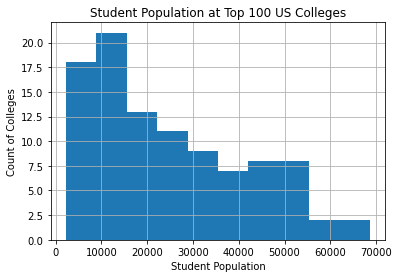

In [27]:
df['Population'].hist()
plt.title('Student Population at Top 100 US Colleges')
plt.xlabel('Student Population')
plt.ylabel('Count of Colleges')
plt.show()

The histogram is skewed right. There are significantly more colleges in the 10,000-20,000 student range than the higher 60,000+ range. There is however, a wide range likely due to different populations of states and variations between public and private universites. We can see below that the maximum population value is at Texas A&M, a large public research university in Texas. On the other hand, the minimum value is Cal Tech, a small private tech school.

In [28]:
print(df[df['Population'] == 68679])

    Rank                            College Name State  \
78    79  Texas A & M University-College Station    TX   

    Undergraduate Tuition & Fees  SAT Score  Acceptance Rate  Population  \
78                         39340     1275.0             0.58       68679   

    Graduation Rate  
78             0.82  


In [29]:
print(df[df['Population'] == 2233])

   Rank                        College Name State  \
6     7  California Institute of Technology    CA   

   Undergraduate Tuition & Fees  SAT Score  Acceptance Rate  Population  \
6                         56862     1545.0             0.06        2233   

   Graduation Rate  
6             0.94  


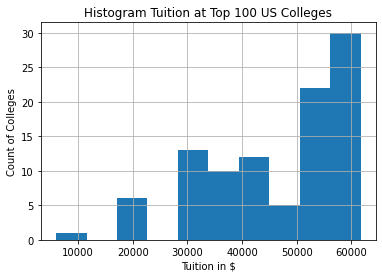

In [30]:
df['Undergraduate Tuition & Fees'].hist()
plt.title('Histogram Tuition at Top 100 US Colleges')
plt.xlabel('Tuition in $')
plt.ylabel('Count of Colleges')
plt.show()

Tuition on the other hand is skewed left, showing a disturbingly large amount of US colleges charging their students massive amounts of money.

In [31]:
df['Undergraduate Tuition & Fees'].describe()

count       99.000000
mean     46339.111111
std      12625.979888
min       5970.000000
25%      36525.000000
50%      51361.000000
75%      57300.000000
max      61671.000000
Name: Undergraduate Tuition & Fees, dtype: float64

Intuitively, it would seem that cheaper colleges would be public schools while more expensive colleges are private, let's see if our intuition is right

In [32]:
df2 = df.sort_values(by=['Undergraduate Tuition & Fees'])

In [33]:
df2.head(25)

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate
35,36,Brigham Young University-Provo,UT,5970,1315.0,0.67,34499,0.78
62,63,Florida State University,FL,18786,1270.0,0.36,41005,0.83
97,98,Florida International University,FL,18963,1195.0,0.58,57942,0.63
96,97,San Diego State University,CA,19600,1215.0,0.34,35303,0.73
82,83,University of Pittsburgh-Pittsburgh Campus,PA,19679,1350.0,0.57,28673,0.83
99,100,Harding University,AR,21540,1165.0,0.61,5121,0.69
86,87,University of Central Florida,FL,22467,1255.0,0.44,68475,0.72
45,46,University of Florida,FL,28659,1390.0,0.37,52218,0.88
61,62,Purdue University-Main Campus,IN,28794,1315.0,0.60,44474,0.82
71,72,North Carolina State University at Raleigh,NC,29220,1335.0,0.45,35479,0.82


In [34]:
df2.tail(25)

,Rank,College Name,State,Undergraduate Tuition & Fees,SAT Score,Acceptance Rate,Population,Graduation Rate
21,22,Washington University in St Louis,MO,57386,1520.0,0.14,15852,0.95
46,47,Villanova University,PA,57460,1395.0,0.28,11030,0.90
44,45,Brandeis University,MA,57615,1435.0,0.30,5800,0.87
12,13,Duke University,NC,57633,1525.0,0.08,16606,0.95
22,23,University of Notre Dame,IN,57699,1475.0,0.16,12607,0.96
5,6,Yale University,CT,57700,1515.0,0.06,13433,0.97
79,80,Wake Forest University,NC,57760,NaN,0.30,8401,0.88
18,19,Georgetown University,DC,57928,1465.0,0.14,19204,0.95
58,59,Pepperdine University,CA,58002,1340.0,0.32,7961,0.86
32,33,Boston University,MA,58072,1425.0,0.19,34657,0.88


In fact the upper and lower quarter of the data match our intuition exactly. However, as seen below, one can still identify US public universities in the upper half of tuition such as the University of Michigan at Ann Arbor and the University of Virgina. While perhaps these prices are averages taking into account out of state tuitions, considering the fact that public univerisites are made for citizens to easily gain education, this fact is definitely noteworthy.

In [35]:
print(df[df['Undergraduate Tuition & Fees'] >= 51361])

    Rank                                 College Name State  \
0      1                          Stanford University    CA   
1      2                           Harvard University    MA   
3      4        Massachusetts Institute of Technology    MA   
4      5  Columbia University in the City of New York    NY   
5      6                              Yale University    CT   
6      7           California Institute of Technology    CA   
7      8                        University of Chicago    IL   
8      9                   University of Pennsylvania    PA   
9     10                             Brown University    RI   
10    11                      Northwestern University    IL   
11    12                            Dartmouth College    NH   
12    13                              Duke University    NC   
13    14                           Cornell University    NY   
15    16                        Vanderbilt University    TN   
18    19                        Georgetown University  

Let's see which states have the most/least colleges in the top 100

In [36]:
state_counts = df.groupby('State')['State'].count()

In [37]:
print(state_counts)

State
 AR     1
 AZ     1
 CA    16
 CO     2
 CT     2
 DC     3
 DE     1
 FL     5
 GA     3
 HI     1
 IL     4
 IN     2
 LA     1
 MA     8
 MD     2
 MI     2
 MN     1
 MO     2
 NC     4
 NH     1
 NJ     3
 NY     9
 OH     2
 OK     1
 PA     6
 RI     1
 TN     2
 TX     7
 UT     1
 VA     3
 WA     1
 WI     1
Name: State, dtype: int64


Let's visualize this

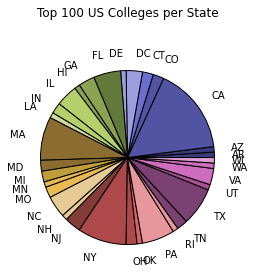

In [38]:
plt.pie(state_counts, labels = ['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'LA', 
                                'MA', 'MD', 'MI', 'MN', 'MO', 'NC', 'NH', 'NJ', 'NY', 'OH', 'OK', 'PA', 'RI', 
                                'TN', 'TX', 'UT', 'VA', 'WA', 'WI'], colors = plt.cm.tab20b(np.arange(32)/32.), wedgeprops = {"edgecolor" : "black"}, labeldistance=1.2)
plt.title('Top 100 US Colleges per State', pad=32)
plt.show()

California looks to be the place to be for good colleges, though New York and Massachusetts aren't bad picks either

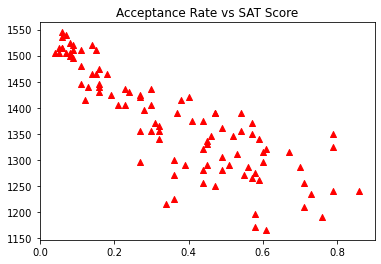

In [39]:
plt.scatter(df['Acceptance Rate'], df['SAT Score'], color='red', marker='^')
plt.title('Acceptance Rate vs SAT Score')
plt.show()

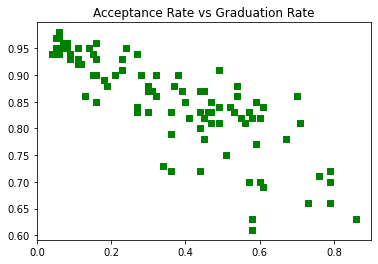

In [40]:
plt.scatter(df['Acceptance Rate'], df['Graduation Rate'], color='green', marker=',')
plt.title('Acceptance Rate vs Graduation Rate')
plt.show()

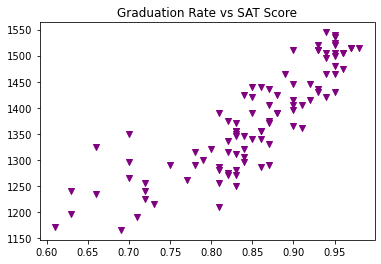

In [41]:
plt.scatter(df['Graduation Rate'], df['SAT Score'], color='purple', marker='v')
plt.title('Graduation Rate vs SAT Score')
plt.show()

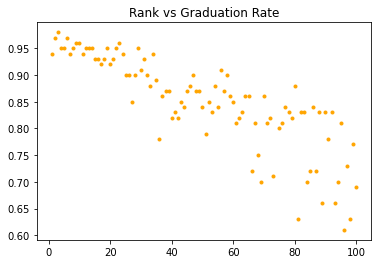

In [42]:
plt.scatter(df['Rank'], df['Graduation Rate'], color='orange', marker='.')
plt.title('Rank vs Graduation Rate')
plt.show()

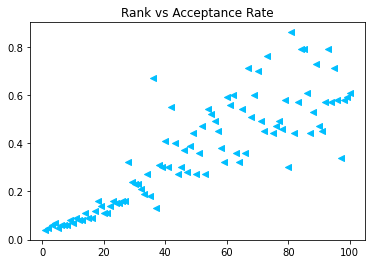

In [43]:
plt.scatter(df['Rank'], df['Acceptance Rate'], color='deepskyblue', marker='<')
plt.title('Rank vs Acceptance Rate')
plt.show()

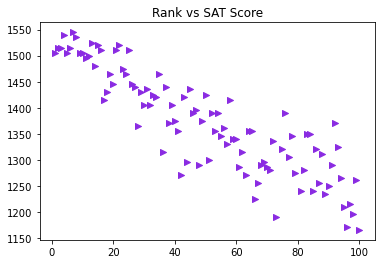

In [44]:
plt.scatter(df['Rank'], df['SAT Score'], color='blueviolet', marker='>')
plt.title('Rank vs SAT Score')
plt.show()